In [123]:
import pandas as pd
import os


In [332]:
# open files
# set resoultion -> for jpeg/png/jpg
#evaluate results
#TASK TO ANALYSE
# - time
# - how image resulution and size impact
# - analyse cases
# -- case 1: key-value analysis succeeds right/correct ?
# -- case 2: key-value analysis fails, but only two options are found (no multiple choices) right/correct ?
# -- case 3: key-value analysis fails, multiple choices are found -> selection, option right/correcr ?
# -- case 4: no analysis succeed



df = pd.read_csv('airport_iata.csv')
df = df[df['iata_code'].notna()]
df = df[df.type != 'closed']
df = df[df.type != 'small_airport'] 
df = df[df.type != 'heliport']
df = df[df.type != 'seaplane_base']
df = df[df.type != 'balloonport']
df

#coordinates (lon, lat)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
6220,5A8,medium_airport,Aleknagik / New Airport,66.0,NaN,US,US-AK,Aleknagik,5A8,WKK,5A8,"-158.617996216, 59.2826004028"
10489,AGGH,medium_airport,Honiara International Airport,28.0,OC,SB,SB-CT,Honiara,AGGH,HIR,NaN,"160.05499267578, -9.4280004501343"
10494,AGGM,medium_airport,Munda Airport,10.0,OC,SB,SB-WE,NaN,AGGM,MUA,NaN,"157.26300048828125, -8.327969551086426"
10516,AHJ,medium_airport,Hongyuan Airport,11600.0,AS,CN,CN-51,Aba,ZUHY,AHJ,NaN,"102.35224, 32.53154"
10740,ANYN,medium_airport,Nauru International Airport,22.0,OC,NR,NR-14,Yaren District,ANYN,INU,NaN,"166.919006, -0.547458"
...,...,...,...,...,...,...,...,...,...,...,...,...
57412,ZYTL,large_airport,Zhoushuizi Airport,107.0,AS,CN,CN-21,Dalian,ZYTL,DLC,NaN,"121.53900146484375, 38.9656982421875"
57413,ZYTN,medium_airport,Tonghua Sanyuanpu Airport,1200.0,AS,CN,CN-22,Tonghua,ZYTN,TNH,NaN,"125.703333333, 42.2538888889"
57414,ZYTX,large_airport,Taoxian Airport,198.0,AS,CN,CN-21,Shenyang,ZYTX,SHE,NaN,"123.48300170898438, 41.639801025390625"
57415,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,624.0,AS,CN,CN-22,Yanji,ZYYJ,YNJ,NaN,"129.451004028, 42.8828010559"


In [333]:
df[df['iata_code'] == "SVO"]

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
52653,UUEE,large_airport,Sheremetyevo International Airport,622.0,EU,RU,RU-MOS,Moscow,UUEE,SVO,NaN,"37.4146, 55.972599"


In [90]:
from math import pi , acos , sin , cos
def calcd(y1,x1, y2,x2):
   #
   y1  = float(y1)
   x1  = float(x1)
   y2  = float(y2)
   x2  = float(x2)
   #
   R   = 3958.76 # miles
   #
   y1 *= pi/180.0
   x1 *= pi/180.0
   y2 *= pi/180.0
   x2 *= pi/180.0
   #
   # approximate great circle distance with law of cosines
   #
   x = sin(y1)*sin(y2) + cos(y1)*cos(y2)*cos(x2-x1)
   if x > 1:
       x = 1
   return acos( x ) * R

In [88]:
df[df['iata_code'] == 'MXP']['coordinates']

33016    8.72811, 45.6306
Name: coordinates, dtype: object

In [121]:
pip install vincenty

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [122]:
pip install haversine

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [196]:
from haversine import haversine, Unit
from vincenty import vincenty

coords = df['coordinates'].tolist()
count  = 0
vins = []
havs = []
locs = []
for i in coords:
    for j in range(count+1, len(coords)-1):
        loc_1_lon = float(i.split(",")[0])
        loc_1_lat = float(i.split(",")[1])
        loc_2_lon = float(coords[j].split(",")[0])
        loc_2_lat = float(coords[j].split(",")[1])
        loc_1 = (loc_1_lat, loc_1_lon)
        loc_2 = (loc_2_lat, loc_2_lon)
        vin = vincenty(loc_1, loc_2)
        hav = haversine(loc_1, loc_2)
        locs.append((loc_1, loc_2))
        havs.append(hav)
        vins.append(vin)
        
    count += 1
    

In [197]:
len(vins)

9961416

In [198]:
len(havs)

9961416

In [184]:
len(locs)

9961416

In [185]:
sum_all = 0
diffs = []
c_error = 0
for i in range(0, len(vins)):
    if type(vins[i]) != None and type(havs[i]) != None:
        try:
            x = abs(vins[i] - havs[i]) 
            diffs.append(x)
            sum_all += x
        except:
            
            c_error +=1
avg = sum_all/(len(havs) - c_error)
print(avg)

11.969419471046066


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e669849d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e669900d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e66984670>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e66990790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e66990a90>],
 'means': []}

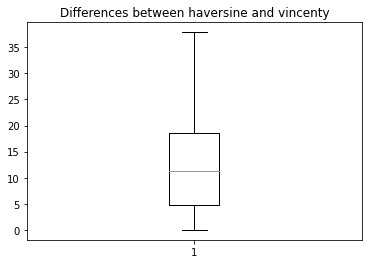

In [187]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Differences between haversine and vincenty')
ax1.boxplot(diffs)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9e3282f400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9e3282fac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9e3282f0a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9e328361c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e328364c0>,
 'means': []}

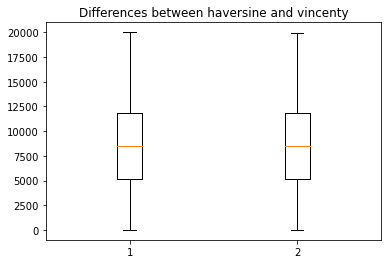

In [211]:
xx = [x for x in havs if x is not None]
yy = [x for x in vins if x is not None]
fig2, ax2 = plt.subplots()
ax2.set_title('haversine and vincenty distances')
ax2.boxplot([xx, yy])

In [240]:
import os
from PIL import Image

dirnames = []
dirpaths= []
filenames = []
filepaths = []
widths = []
heights = []
dpis = []
directory = 'tickets'
images_format = ["jpeg", "jpg", "png"]
small_paths = []
medium_paths = []
big_paths = []
size_smalls = []
size_mediums = []
size_bigs = []
dpis_small = []
dpis_medium = []
dpis_big = []
originals = []

# print(os.walk(directory))
for root, dirs, files in os.walk(directory):
#     print(len(dirs))
    for dirname in dirs:
        print(dirname)
        dirname_path = os.path.join(root, dirname)
        os.mkdir(dirname_path + "/im_small/")
        os.mkdir(dirname_path + "/im_medium/")
        os.mkdir(dirname_path + "/im_big/")
        for root_1, dirs_1, files_1 in os.walk(dirname_path):
            
            for filename in files_1:
                print(file_path)
                print(filename)
                if filename.split(".")[1].lower() in images_format:
                    file_path = dirname_path + "/" + filename
                    
#                     size = 4961,7016
                    im = Image.open(file_path)
#                     print(im.info['dpi'])
#                     width, height = im.size
#                     print(width)
#                     print(height)
                    
                    pixel_diff = 200
                    if (width - pixel_diff) > 0 and (height - pixel_diff) > 0:
                        size_small = (width - pixel_diff), (height - pixel_diff)
                        im_small = im.resize(size_small, Image.ANTIALIAS)
                        im_small_name = dirname_path + "/im_small/" + filename
                        print(im_small_name)
                        im_small.save(im_small_name, "PNG")
                        size_big = (width + pixel_diff), (height + pixel_diff)
                        im_big = im.resize(size_big, Image.ANTIALIAS)
                        im_big_name = dirname_path + "/im_big/" + filename
                        print(im_big_name)
                        im_big.save(im_big_name, "PNG")
                        im_medium_name = dirname_path + "/im_medium/" + filename
                        size_medium = im.size
                        os.rename(file_path, im_medium_name)
                        im_medium = Image.open(im_medium_name)
                        original = 'medium'
                    else:
                        size_small = im.size
                        size_medium = (width + pixel_diff), (height + pixel_diff)
                        im_medium = im.resize(size_medium, Image.ANTIALIAS)
                        im_medium_name = dirname_path + "/im_medium/" + filename
                        print(im_medium_name)
                        im_medium.save(im_medium_name, "PNG")
                        size_big = (width + (pixel_diff * 2)), (height + (pixel_diff * 2))
                        im_big = im.resize(size_big, Image.ANTIALIAS)
                        im_big_name = dirname_path + "/im_big/" + filename
                        print(im_big_name)
                        im_big.save(im_big_name, "PNG")
                        im_small_name = dirname_path + "/im_small/" + filename
                        os.rename(file_path, im_small_name)
                        im_small = Image.open(im_small_name)
                        original = 'small'
                    
                    width, height = im.size
                    dirnames.append(dirname)
                    dirpaths.append(dirname_path)
                    filenames.append(filename)
                    small_paths.append(im_small_name)
                    medium_paths.append(im_medium_name)
                    big_paths.append(im_big_name)
                    size_smalls.append(size_small)
                    size_mediums.append(size_medium)
                    size_bigs.append(size_big)
                    originals.append(original)
#                     filepaths.append(file_path)
#                     widths.append(width)
#                     heights.append(height)
                    if 'dpi' in im_small.info:
                        dpis_small.append(im_small.info['dpi'])
                    else:
                        dpis_small.append((0,0))
                    if 'dpi' in im_medium.info:
                        dpis_medium.append(im_medium.info['dpi'])
                    else:
                        dpis_medium.append((0,0))
                    if 'dpi' in im_big.info:
                        dpis_big.append(im_big.info['dpi'])
                    else:
                        dpis_big.append((0,0))
            
            break
    break

lotpolishair
tickets/lotpolishair/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_medium/im_med

taagairlines
tickets/frontierairline/frontierairlineTicket.jpeg
tagairTicket.webp
voloteaair
tickets/frontierairline/frontierairlineTicket.jpeg
voloteaairTicket3.jpeg
tickets/voloteaair/im_small/voloteaairTicket3.jpeg
tickets/voloteaair/im_big/voloteaairTicket3.jpeg
tickets/voloteaair/voloteaairTicket3.jpeg
voloteaairTicket2.jpeg
tickets/voloteaair/im_small/voloteaairTicket2.jpeg
tickets/voloteaair/im_big/voloteaairTicket2.jpeg
tickets/voloteaair/voloteaairTicket2.jpeg
voloteairTicket.jpeg
tickets/voloteaair/im_small/voloteairTicket.jpeg
tickets/voloteaair/im_big/voloteairTicket.jpeg
vivaaerobus
tickets/voloteaair/voloteairTicket.jpeg
vivaaerobusTicket.jpeg
tickets/vivaaerobus/im_small/vivaaerobusTicket.jpeg
tickets/vivaaerobus/im_big/vivaaerobusTicket.jpeg
volarisair
tickets/vivaaerobus/vivaaerobusTicket.jpeg
volarisTicket.jpeg
tickets/volarisair/im_small/volarisTicket.jpeg
tickets/volarisair/im_big/volarisTicket.jpeg
emiratesair
tickets/volarisair/volarisTicket.jpeg
emiratesTicket.pn

In [241]:
import pandas as pd
df = pd.DataFrame(list(zip(dirnames, dirpaths, filenames, originals, small_paths,medium_paths, big_paths,size_smalls, size_mediums, size_bigs, dpis_small, dpis_medium, dpis_big )),
               columns =['directory_name', 'directory_path', 'file_name', 'original_size', 'small_path', 'medium_path', 'big_path', 'small_size', 'medium_size', 'big_size', 'small_dpi', 'medium_dpi', 'big_dpi'])


In [242]:
df

,directory_name,directory_path,file_name,original_size,small_path,medium_path,big_path,small_size,medium_size,big_size,small_dpi,medium_dpi,big_dpi
0,lotpolishair,tickets/lotpolishair,lotpolishairTicket.jpeg,medium,tickets/lotpolishair/im_small/lotpolishairTick...,tickets/lotpolishair/im_medium/lotpolishairTic...,tickets/lotpolishair/im_big/lotpolishairTicket...,"(164, 604)","(564, 1004)","(564, 1004)","(72, 72)","(72, 72)","(72, 72)"
1,lotpolishair,tickets/lotpolishair,lotairTicket.jpeg,medium,tickets/lotpolishair/im_small/lotairTicket.jpeg,tickets/lotpolishair/im_medium/lotairTicket.jpeg,tickets/lotpolishair/im_big/lotairTicket.jpeg,"(364, 804)","(253, 450)","(764, 1204)","(1, 1)","(1, 1)","(1, 1)"
2,aegeanair,tickets/aegeanair,aegeanTicket.jpeg,medium,tickets/aegeanair/im_small/aegeanTicket.jpeg,tickets/aegeanair/im_medium/aegeanTicket.jpeg,tickets/aegeanair/im_big/aegeanTicket.jpeg,"(53, 250)","(787, 1111)","(453, 650)","(96, 96)","(96, 96)","(96, 96)"
3,aegeanair,tickets/aegeanair,aegeanairTicket.jpeg,medium,tickets/aegeanair/im_small/aegeanairTicket.jpeg,tickets/aegeanair/im_medium/aegeanairTicket.jpeg,tickets/aegeanair/im_big/aegeanairTicket.jpeg,"(587, 911)","(548, 343)","(987, 1311)","(96, 96)","(96, 96)","(96, 96)"
4,airfrance,tickets/airfrance,airfranceTicket copy.jpeg,medium,tickets/airfrance/im_small/airfranceTicket cop...,tickets/airfrance/im_medium/airfranceTicket co...,tickets/airfrance/im_big/airfranceTicket copy....,"(348, 143)","(563, 311)","(748, 543)","(72, 72)","(72, 72)","(72, 72)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,aeroflot,tickets/aeroflot,aeroflotTicket.jpeg,medium,tickets/aeroflot/im_small/aeroflotTicket.jpeg,tickets/aeroflot/im_medium/aeroflotTicket.jpeg,tickets/aeroflot/im_big/aeroflotTicket.jpeg,"(1606, 1382)","(787, 1111)","(2006, 1782)","(96, 96)","(96, 96)","(96, 96)"
77,vuelingair,tickets/vuelingair,vuelingairTicket2.jpeg,medium,tickets/vuelingair/im_small/vuelingairTicket2....,tickets/vuelingair/im_medium/vuelingairTicket2...,tickets/vuelingair/im_big/vuelingairTicket2.jpeg,"(587, 911)","(793, 1115)","(987, 1311)","(96, 96)","(96, 96)","(96, 96)"
78,vuelingair,tickets/vuelingair,vuelingTicket.jpeg,medium,tickets/vuelingair/im_small/vuelingTicket.jpeg,tickets/vuelingair/im_medium/vuelingTicket.jpeg,tickets/vuelingair/im_big/vuelingTicket.jpeg,"(593, 915)","(564, 1003)","(993, 1315)","(72, 72)","(72, 72)","(72, 72)"
79,vuelingair,tickets/vuelingair,vuelingairTicket.jpeg,medium,tickets/vuelingair/im_small/vuelingairTicket.jpeg,tickets/vuelingair/im_medium/vuelingairTicket....,tickets/vuelingair/im_big/vuelingairTicket.jpeg,"(364, 803)","(793, 1115)","(764, 1203)","(96, 96)","(96, 96)","(96, 96)"


In [243]:
df.to_csv("tickets.csv", sep=',', encoding='utf-8')

In [318]:
import requests
import json
import time 

df_2 = pd.read_csv("tickets.csv")
df_2

,Unnamed: 0,directory_name,directory_path,file_name,original_size,small_path,medium_path,big_path,small_size,medium_size,big_size,small_dpi,medium_dpi,big_dpi
0,0,lotpolishair,tickets/lotpolishair,lotpolishairTicket.jpeg,medium,tickets/lotpolishair/im_small/lotpolishairTick...,tickets/lotpolishair/im_medium/lotpolishairTic...,tickets/lotpolishair/im_big/lotpolishairTicket...,"(164, 604)","(564, 1004)","(564, 1004)","(72, 72)","(72, 72)","(72, 72)"
1,1,lotpolishair,tickets/lotpolishair,lotairTicket.jpeg,medium,tickets/lotpolishair/im_small/lotairTicket.jpeg,tickets/lotpolishair/im_medium/lotairTicket.jpeg,tickets/lotpolishair/im_big/lotairTicket.jpeg,"(364, 804)","(253, 450)","(764, 1204)","(1, 1)","(1, 1)","(1, 1)"
2,2,aegeanair,tickets/aegeanair,aegeanTicket.jpeg,medium,tickets/aegeanair/im_small/aegeanTicket.jpeg,tickets/aegeanair/im_medium/aegeanTicket.jpeg,tickets/aegeanair/im_big/aegeanTicket.jpeg,"(53, 250)","(787, 1111)","(453, 650)","(96, 96)","(96, 96)","(96, 96)"
3,3,aegeanair,tickets/aegeanair,aegeanairTicket.jpeg,medium,tickets/aegeanair/im_small/aegeanairTicket.jpeg,tickets/aegeanair/im_medium/aegeanairTicket.jpeg,tickets/aegeanair/im_big/aegeanairTicket.jpeg,"(587, 911)","(548, 343)","(987, 1311)","(96, 96)","(96, 96)","(96, 96)"
4,4,airfrance,tickets/airfrance,airfranceTicket copy.jpeg,medium,tickets/airfrance/im_small/airfranceTicket cop...,tickets/airfrance/im_medium/airfranceTicket co...,tickets/airfrance/im_big/airfranceTicket copy....,"(348, 143)","(563, 311)","(748, 543)","(72, 72)","(72, 72)","(72, 72)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,aeroflot,tickets/aeroflot,aeroflotTicket.jpeg,medium,tickets/aeroflot/im_small/aeroflotTicket.jpeg,tickets/aeroflot/im_medium/aeroflotTicket.jpeg,tickets/aeroflot/im_big/aeroflotTicket.jpeg,"(1606, 1382)","(787, 1111)","(2006, 1782)","(96, 96)","(96, 96)","(96, 96)"
77,77,vuelingair,tickets/vuelingair,vuelingairTicket2.jpeg,medium,tickets/vuelingair/im_small/vuelingairTicket2....,tickets/vuelingair/im_medium/vuelingairTicket2...,tickets/vuelingair/im_big/vuelingairTicket2.jpeg,"(587, 911)","(793, 1115)","(987, 1311)","(96, 96)","(96, 96)","(96, 96)"
78,78,vuelingair,tickets/vuelingair,vuelingTicket.jpeg,medium,tickets/vuelingair/im_small/vuelingTicket.jpeg,tickets/vuelingair/im_medium/vuelingTicket.jpeg,tickets/vuelingair/im_big/vuelingTicket.jpeg,"(593, 915)","(564, 1003)","(993, 1315)","(72, 72)","(72, 72)","(72, 72)"
79,79,vuelingair,tickets/vuelingair,vuelingairTicket.jpeg,medium,tickets/vuelingair/im_small/vuelingairTicket.jpeg,tickets/vuelingair/im_medium/vuelingairTicket....,tickets/vuelingair/im_big/vuelingairTicket.jpeg,"(364, 803)","(793, 1115)","(764, 1203)","(96, 96)","(96, 96)","(96, 96)"


In [319]:
dirs = df_2.directory_path.unique()

In [304]:


url = 'https://tno9rdnt25.execute-api.eu-central-1.amazonaws.com/prod/dynamodbmanager'
def analyze_files(dirs):
    times = []
    results = []
    starts = []
    ends = []
    routes = []
    filepaths = []
    dirnames = []
    analyzed_files = []
    sizes = []
    for i in dirs:
        small_files = df_2[df_2['directory_path'] == i]['small_path']
        med_files = df_2[df_2['directory_path'] == i]['medium_path']
        big_files = df_2[df_2['directory_path'] == i]['big_path']
        filenames = df_2[df_2['directory_path'] == i]['file_name']

        for j in filenames:
            s = [string for string in small_files if j in string]
            m = [string for string in med_files if j in string]
            b = [string for string in big_files if j in string]
            #small
            body =  '{"filename": "' + s[0] + '"}'
            print(body)
            start = time.time()
            
            s_call = requests.post(url, data = body)
            payload_small = json.loads(s_call.text)
            
            end = time.time()
            times.append(end - start)
            print(payload_small)
            res = payload_small['statusCode']
            results.append(res)
            if res == 200:
                small_body = json.loads(payload_small['body'])
                starts.append(small_body['StartPoint'])
                ends.append(small_body['EndPoint'])
                routes.append(small_body['PossibleRoutes'])
            else:
                starts.append("")
                ends.append("")
                routes.append([])
            filepaths.append(j)
            dirnames.append(i)
            analyzed_files.append(s[0])
            sizes.append('small')


            #medium
            body =  '{"filename": "' + m[0] + '"}'
            print(body)
            start = time.time()
            
            m_call = requests.post(url, data = body)
            payload_med = json.loads(m_call.text)
            
            end = time.time()
            times.append(end - start)
            print(payload_med)
            res = payload_med['statusCode']
            results.append(res)
            if res == 200:
                med_body = json.loads(payload_med['body'])
                starts.append(med_body['StartPoint'])
                ends.append(med_body['EndPoint'])
                routes.append(med_body['PossibleRoutes'])
            else:
                starts.append("")
                ends.append("")
                routes.append([])
            filepaths.append(j)
            dirnames.append(i)
            analyzed_files.append(m[0])
            sizes.append('medium')

            #large
            body =  '{"filename": "' + b[0] + '"}'
            print(body)
            start = time.time()
            b_call = requests.post(url, data = body)
            payload_big = json.loads(b_call.text)
            end = time.time()
            times.append(end - start)
            print(payload_big)
            res = payload_big['statusCode']
            results.append(res)
            if res == 200:
                big_body = json.loads(payload_big['body'])
                starts.append(big_body['StartPoint'])
                ends.append(big_body['EndPoint'])
                routes.append(big_body['PossibleRoutes'])
            else:
                starts.append("")
                ends.append("")
                routes.append([])
            filepaths.append(j)
            dirnames.append(i)
            analyzed_files.append(b[0])
            sizes.append('big')

    df_new = pd.DataFrame(list(zip(analyzed_files, sizes, filepaths, dirnames, times, results, starts, ends, routes)),
              columns =['file_analyzed', 'size_category', 'original_file_name', 'dir_name', 'exec_time', 'result', 'trip _start', 'trip_end', 'routes'] )
    return df_new

In [317]:

# df, dirs_1 = analyze_files(
a = dirs[0:10]
# print(a)
b = dirs[10:20]
# print(b)
c = dirs[20:30]
# print(c)
d = dirs[30:40]
# print(d)
e = dirs[40:50]

In [306]:
df_1 = analyze_files(a)
df_1

{"filename": "tickets/lotpolishair/im_small/lotpolishairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 482.9266982618261, "PossibleRoutes": [], "StartPoint": "Warsaw Chopin Airport", "EndPoint": "V\\u00c3\\u00a1clav Havel Airport Prague"}'}
{"filename": "tickets/lotpolishair/im_medium/lotpolishairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[482.9266982618261, ["Warsaw Chopin Airport", "V\\u00c3\\u00a1clav Havel Airport Prague"]], [6908.913275809824, ["Warsaw Chopin Airport", "Clarence A. Bain Airport"]], [6198.952871187404, ["Warsaw Chopin Airport", "Guangzhou Baiyun International Airport"]], [4205.917315093166, ["Warsaw Chopin Airport", "Sainte Marie Airport"]], [5712.216065158105, ["Warsaw Chopin Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [5477.0985135578885, ["Warsaw Chopin Airport", "Pinto Martins International Airport"]], [7186.158384404553, ["Warsaw Chopin Airport", "Anderson Regio

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 5402.9195703809355, "PossibleRoutes": [], "StartPoint": "Singapore Changi Airport", "EndPoint": "Warsaw Chopin Airport"}'}
{"filename": "tickets/lotpolishair/im_medium/lotairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 5402.9195703809355, "PossibleRoutes": [], "StartPoint": "Singapore Changi Airport", "EndPoint": "Warsaw Chopin Airport"}'}
{"filename": "tickets/lotpolishair/im_big/lotairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 5402.9195703809355, "PossibleRoutes": [], "StartPoint": "Singapore Changi Airport", "EndPoint": "Warsaw Chopin Airport"}'}
{"filename": "tickets/aegeanair/im_small/aegeanTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 0, "PossibleRoutes": [], "StartPoint": 0, "EndPoint": 0}'}
{"filename": "tickets/aegeanair/im_medium/aegeanTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 1037.533604527587

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/royaldutchair/im_small/klmairTicket2.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[5.899012088775635e-05, ["Amsterdam Airport Schiphol", "Amsterdam Airport Schiphol"]], [1464.641953773968, ["Amsterdam Airport Schiphol", "Lennart Meri Tallinn Airport"]]], "StartPoint": -1, "EndPoint": -1}'}
{"filename": "tickets/royaldutchair/im_medium/klmairTicket2.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[5.899012088775635e-05, ["Amsterdam Airport Schiphol", "Amsterdam Airport Schiphol"]], [1464.641953773968, ["Amsterdam Airport Schiphol", "Lennart Meri Tallinn Airport"]]], "StartPoint": -1, "EndPoint": -1}'}
{"filename": "tickets/royaldutchair/im_big/klmairTicket2.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[5.899012088775635e-05, ["

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[5016.721216781251, ["Augusta State Airport", "Palma De Mallorca Airport"]], [4968.141453703223, ["Augusta State Airport", "Barcelona International Airport"]], [0.0, ["Augusta State Airport", "Augusta State Airport"]], [2528.779448493309, ["Augusta State Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [11863.422633475006, ["Augusta State Airport", "Guangzhou Baiyun International Airport"]], [8817.360397298604, ["Augusta State Airport", "Sainte Marie Airport"]], [2769.8167843499377, ["Augusta State Airport", "Pinto Martins International Airport"]], [903.4592246528582, ["Augusta State Airport", "Anderson Regional Airport"]], [128.83772155483135, ["Palma De Mallorca Airport", "Barcelona International Airport"]], [5016.721216781251, ["Palma De Mallorca Airport", "Augusta State Airport"]], [4195.455076297469, ["Palma De Mallorca Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [7573.

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/latamairlines/im_medium/latamairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[1330.6937208955173, ["Jackson-Medgar Wiley Evers International Airport", "Desierto de Atacama Airport"]], [1329.740428861198, ["Jackson-Medgar Wiley Evers International Airport", "Comodoro Arturo Merino Ben\\u00c3\\u00adtez International Airport"]], [139.39356529045273, ["Desierto de Atacama Airport", "Comodoro Arturo Merino Ben\\u00c3\\u00adtez International Airport"]]], "StartPoint": -1, "EndPoint": -1}'}
{"filename": "tickets/latamairlines/im_big/latamairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[1330.6937208955173, ["Jackson-Medgar Wiley Evers International Airport", "Desierto de Atacama Airport"]], [1329.740428861198, ["Jackson-Medgar Wiley Evers International Airport", 

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[2884.929146007446, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Anderson Regional Airport"]], [1870.0354246027287, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Antonio Nery Juarbe Pol Airport"]], [0.0, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [10634.578169522676, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Geraldton Airport"]], [303.9960842965677, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Pinto Martins International Airport"]], [2544.4103015885285, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Clarence A. Bain Airport"]], [10791.821199344497, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Kaohsiung International Airport"]], [4399.769399702127, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Dundo Airport"]], [6179.189792301495, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Ha\'il Airport"]], [1135.5

,file_analyzed,size_category,original_file_name,dir_name,exec_time,result,trip _start,trip_end,routes
0,tickets/lotpolishair/im_small/lotpolishairTick...,small,lotpolishairTicket.jpeg,tickets/lotpolishair,8.040530,200,Warsaw Chopin Airport,VÃ¡clav Havel Airport Prague,[]
1,tickets/lotpolishair/im_medium/lotpolishairTic...,medium,lotpolishairTicket.jpeg,tickets/lotpolishair,9.492479,200,-1,-1,"[[482.9266982618261, [Warsaw Chopin Airport, V..."
2,tickets/lotpolishair/im_big/lotpolishairTicket...,big,lotpolishairTicket.jpeg,tickets/lotpolishair,9.519685,200,-1,-1,"[[482.9266982618261, [Warsaw Chopin Airport, V..."
3,tickets/lotpolishair/im_small/lotairTicket.jpeg,small,lotairTicket.jpeg,tickets/lotpolishair,8.293320,200,Singapore Changi Airport,Warsaw Chopin Airport,[]
4,tickets/lotpolishair/im_medium/lotairTicket.jpeg,medium,lotairTicket.jpeg,tickets/lotpolishair,7.784129,200,Singapore Changi Airport,Warsaw Chopin Airport,[]
...,...,...,...,...,...,...,...,...,...
64,tickets/britishairways/im_medium/britishairTic...,medium,britishairTicket.jpeg,tickets/britishairways,8.602712,400,,,[]
65,tickets/britishairways/im_big/britishairTicket...,big,britishairTicket.jpeg,tickets/britishairways,8.703812,400,,,[]
66,tickets/chinaairlines/im_small/chinaairTicket.png,small,chinaairTicket.png,tickets/chinaairlines,8.600854,400,,,[]
67,tickets/chinaairlines/im_medium/chinaairTicket...,medium,chinaairTicket.png,tickets/chinaairlines,11.569485,200,-1,-1,"[[10354.987687418286, [Sanya Phoenix Internati..."


In [310]:
df_1.dir_name.unique()
df_1.to_csv("results_1.csv", sep=',', encoding='utf-8')

In [313]:
df_2 = analyze_files(b)
df_2

{"filename": "tickets/garudaindonesiaair/im_small/garudaindonesiTicket.png"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/garudaindonesiaair/im_medium/garudaindonesiTicket.png"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/garudaindonesiaair/im_big/garudaindonesiTicket.png"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 7515.52894695036, "PossibleRoutes": [], "StartPoint": "CGK Terminal 2 Jakarta Soekarno Hatta Intl ", "EndPoint": "ugeso: "}'}
{"filename": "tickets/transavia/im_small/transaviaairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[899.2055017388439, ["Charlottesville Albemarle Airport", "Antonio Nery Juarbe Pol Airport"]], [488.28371016229886, ["Charlottesville Albemarle Airport", "Concord Municipal Airport"]], [2720.5404609438197, ["Charlottes

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[5828.11745586666, ["Perth International Airport", "Reggio Calabria Airport"]], [10629.316232179828, ["Perth International Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [10332.582204884233, ["Perth International Airport", "Pinto Martins International Airport"]], [10782.921059285214, ["Perth International Airport", "Anderson Regional Airport"]], [10949.741105291128, ["Perth International Airport", "Clarence A. Bain Airport"]], [4878.533587367015, ["Reggio Calabria Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [4619.299379319962, ["Reggio Calabria Airport", "Pinto Martins International Airport"]], [6797.047639472234, ["Reggio Calabria Airport", "Anderson Regional Airport"]], [6472.37297430511, ["Reggio Calabria Airport", "Clarence A. Bain Airport"]], [0.0, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [303.9960842965677, 

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[10439.082790766293, ["Aberdeen Regional Airport", "Perth International Airport"]], [7876.657376095981, ["Aberdeen Regional Airport", "Reggio Calabria Airport"]], [6778.326337970386, ["Aberdeen Regional Airport", "Angers-Loire Airport"]], [3650.6243718296264, ["Aberdeen Regional Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [3953.502725883865, ["Aberdeen Regional Airport", "Pinto Martins International Airport"]], [1080.661465660248, ["Aberdeen Regional Airport", "Anderson Regional Airport"]], [1409.0637011765525, ["Aberdeen Regional Airport", "Clarence A. Bain Airport"]], [0.0, ["Aberdeen Regional Airport", "Aberdeen Regional Airport"]], [5828.11745586666, ["Perth International Airport", "Reggio Calabria Airport"]], [6554.058914796587, ["Perth International Airport", "Angers-Loire Airport"]], [10629.316232179828, ["Perth International Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airpo

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 240.5204270604331, "PossibleRoutes": [], "StartPoint": "13:15 loannina King Pyrros ", "EndPoint": "12:10 Athens Int E Venizelos "}'}
{"filename": "tickets/jetssmartair/im_small/jetsmartairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[2817.651496581018, ["Friedman Memorial Airport", "La Chinita International Airport"]], [2183.8807596428214, ["Friedman Memorial Airport", "Carriel Sur Airport"]], [2088.963596554782, ["Friedman Memorial Airport", "Balmaceda Airport"]], [2108.382442080627, ["Friedman Memorial Airport", "El Tepual Airport"]], [2177.5515538657805, ["Friedman Memorial Airport", "Anderson Regional Airport"]], [4503.250158085872, ["Friedman Memorial Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [4805.258874842972, ["Friedman Memorial Airport", "Pinto Martins International Airport"]], [6789.5631516120275, ["Friedman Memorial Airport", "Ouro Sogui Airpor

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[2817.651496581018, ["Friedman Memorial Airport", "La Chinita International Airport"]], [2183.8807596428214, ["Friedman Memorial Airport", "Carriel Sur Airport"]], [2088.963596554782, ["Friedman Memorial Airport", "Balmaceda Airport"]], [2108.382442080627, ["Friedman Memorial Airport", "El Tepual Airport"]], [2177.5515538657805, ["Friedman Memorial Airport", "Anderson Regional Airport"]], [4503.250158085872, ["Friedman Memorial Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [4805.258874842972, ["Friedman Memorial Airport", "Pinto Martins International Airport"]], [6789.5631516120275, ["Friedman Memorial Airport", "Ouro Sogui Airport"]], [967.2992545365869, ["La Chinita International Airport", "Carriel Sur Airport"]], [1180.0287096236414, ["La Chinita International Airport", "Balmaceda Airport"]], [1055.3315532576498, ["La Chinita International Airport", "El Tepual Airport"]], [826.84922259

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[2350.5038816870706, ["Maca\\u00c3\\u00a9 Airport", "La Chinita International Airport"]], [3078.999234896904, ["Maca\\u00c3\\u00a9 Airport", "Anderson Regional Airport"]], [884.7558252242536, ["Maca\\u00c3\\u00a9 Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [2800.705723569089, ["Maca\\u00c3\\u00a9 Airport", "Clarence A. Bain Airport"]], [1003.5393846617883, ["Maca\\u00c3\\u00a9 Airport", "Pinto Martins International Airport"]], [10392.701114662192, ["Maca\\u00c3\\u00a9 Airport", "Loakan Airport"]], [0.0, ["La Chinita International Airport", "La Chinita International Airport"]], [826.8492225970933, ["La Chinita International Airport", "Anderson Regional Airport"]], [2065.572477085112, ["La Chinita International Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [478.9666161326386, ["La Chinita International Airport", "Clarence A. Bain Airport"]], [2348.2102595969386, ["La Chinit

,file_analyzed,size_category,original_file_name,dir_name,exec_time,result,trip _start,trip_end,routes
0,tickets/garudaindonesiaair/im_small/garudaindo...,small,garudaindonesiTicket.png,tickets/garudaindonesiaair,8.781306,400,,,[]
1,tickets/garudaindonesiaair/im_medium/garudaind...,medium,garudaindonesiTicket.png,tickets/garudaindonesiaair,8.639887,400,,,[]
2,tickets/garudaindonesiaair/im_big/garudaindone...,big,garudaindonesiTicket.png,tickets/garudaindonesiaair,7.436303,200,CGK Terminal 2 Jakarta Soekarno Hatta Intl,ugeso:,[]
3,tickets/transavia/im_small/transaviaairTicket....,small,transaviaairTicket.jpeg,tickets/transavia,8.908586,200,-1,-1,"[[899.2055017388439, [Charlottesville Albemarl..."
4,tickets/transavia/im_medium/transaviaairTicket...,medium,transaviaairTicket.jpeg,tickets/transavia,9.215813,200,-1,-1,"[[1743.068810841289, [Chania International Air..."
5,tickets/transavia/im_big/transaviaairTicket.jpeg,big,transaviaairTicket.jpeg,tickets/transavia,9.932684,200,-1,-1,"[[1743.068810841289, [Chania International Air..."
6,tickets/utairairline/im_small/utairTicket.jpeg,small,utairTicket.jpeg,tickets/utairairline,8.972900,200,-1,-1,"[[5828.11745586666, [Perth International Airpo..."
7,tickets/utairairline/im_medium/utairTicket.jpeg,medium,utairTicket.jpeg,tickets/utairairline,10.179873,200,-1,-1,"[[5828.11745586666, [Perth International Airpo..."
8,tickets/utairairline/im_big/utairTicket.jpeg,big,utairTicket.jpeg,tickets/utairairline,9.559944,200,-1,-1,"[[5828.11745586666, [Perth International Airpo..."
9,tickets/utairairline/im_small/utairTicket2.jpeg,small,utairTicket2.jpeg,tickets/utairairline,9.102937,200,-1,-1,"[[10439.082790766293, [Aberdeen Regional Airpo..."


In [315]:
df_2.dir_name.unique()
df_2.to_csv("results_2.csv", sep=',', encoding='utf-8')


In [320]:
df_3 = analyze_files(c)
df_3

{"filename": "tickets/voloteaair/im_small/voloteaairTicket3.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/voloteaair/im_medium/voloteaairTicket3.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[10825.062018221017, ["Lakefront Airport", "Guangzhou Baiyun International Airport"]], [3261.1842205060257, ["Lakefront Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [505.68185436673224, ["Lakefront Airport", "Anderson Regional Airport"]], [10641.743725648437, ["Lakefront Airport", "Perth International Airport"]], [6781.854425175468, ["Lakefront Airport", "Villanova D\'Albenga International Airport"]], [1613.4980279543192, ["Lakefront Airport", "Antonio Nery Juarbe Pol Airport"]], [3557.6819129296887, ["Lakefront Airport", "Pinto Martins International Airport"]], [8901.005620555065, ["Lakefront Airport", "Addis Ababa Bole International Airport"]], [58

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/voloteaair/im_medium/voloteaairTicket2.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/voloteaair/im_big/voloteaairTicket2.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/voloteaair/im_small/voloteairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/voloteaair/im_medium/voloteairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/voloteaair/im_big/voloteairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/vivaaerob

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[10401.157930462694, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Qionghai Bo\'ao Airport"]], [0.0, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [1236.652578380008, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Guarani International Airport"]], [2251.3627071499222, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Perales Airport"]], [2884.929146007446, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Anderson Regional Airport"]], [303.9960842965677, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Pinto Martins International Airport"]], [10472.264179221283, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Guangzhou Baiyun International Airport"]], [3261.1842205060257, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Lakefront Airport"]], [4678.729781978822, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Villanova D\'Albenga

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/spiritairlines/im_medium/spiritairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/spiritairlines/im_big/spiritairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/iberiaair/im_small/iberiaairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/iberiaair/im_medium/iberiaairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[1396.9718882904492, ["V\\u00c3\\u00a1clav Havel Airport Prague", "Adolfo Su\\u00c3\\u00a1rez Madrid\\u00e2\\u0080\\u0093Barajas Airport"]], [5814.577184708485, ["V\\u00c3\\u00a1clav Havel Airport Prague", "Augusta State A

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 6890.474314608548, "PossibleRoutes": [], "StartPoint": "Visa Card .... 2206 ", "EndPoint": "19:15 "}'}
{"filename": "tickets/sasairlines/im_big/sasairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[4041.683832434908, ["Pointe Noire Airport", "Birmingham International Airport"]], [4070.9418132776727, ["Pointe Noire Airport", "Copenhagen Kastrup Airport"]], [4305.210954562411, ["Pointe Noire Airport", "Stockholm-Arlanda Airport"]], [6961.43477099684, ["Pointe Noire Airport", "Geraldton Airport"]], [3780.138239981062, ["Pointe Noire Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [6647.697442933244, ["Pointe Noire Airport", "Anderson Regional Airport"]], [3484.2811050037867, ["Pointe Noire Airport", "Pinto Martins International Airport"]], [5554.975998098697, ["Pointe Noire Airport", "Antonio Nery Juarbe Pol Airport"]], [6822.083549220848, ["Pointe Noire Airport", "

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[694.6465023882131, ["Amsterdam Airport Schiphol", "Oslo Gardermoen Airport"]], [3868.989096819365, ["Amsterdam Airport Schiphol", "Entebbe International Airport"]], [5010.669144709507, ["Amsterdam Airport Schiphol", "Robert L. Bradshaw International Airport"]], [7295.542512712591, ["Amsterdam Airport Schiphol", "Guangzhou Baiyun International Airport"]], [4661.483192118249, ["Amsterdam Airport Schiphol", "Pinto Martins International Airport"]], [5795.993320306481, ["Amsterdam Airport Schiphol", "Clarence A. Bain Airport"]], [4074.591006635041, ["Oslo Gardermoen Airport", "Entebbe International Airport"]], [5588.423534497693, ["Oslo Gardermoen Airport", "Robert L. Bradshaw International Airport"]], [6750.291511492187, ["Oslo Gardermoen Airport", "Guangzhou Baiyun International Airport"]], [5352.776907288574, ["Oslo Gardermoen Airport", "Pinto Martins International Airport"]], [6291.915764586874, ["Oslo 

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[425.7621936794146, ["Decatur Airport", "Anderson Regional Airport"]], [3204.4294663813994, ["Decatur Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [10392.850767749142, ["Decatur Airport", "Loakan Airport"]], [3499.6115428073126, ["Decatur Airport", "Pinto Martins International Airport"]], [8011.999840017399, ["Decatur Airport", "Kos Airport"]], [775.6877340337072, ["Decatur Airport", "Clarence A. Bain Airport"]], [1032.210470082092, ["Decatur Airport", "El Dorado International Airport"]], [1538.8562626440669, ["Decatur Airport", "Antonio Nery Juarbe Pol Airport"]], [10902.020306669761, ["Decatur Airport", "Guangzhou Baiyun International Airport"]], [10665.717550866164, ["Decatur Airport", "Perth International Airport"]], [0.0, ["Decatur Airport", "Decatur Airport"]], [83.57432889109484, ["Decatur Airport", "Jackson-Medgar Wiley Evers International Airport"]], [5.899012088775635e-05, ["An

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/wizzair/im_medium/wizzairTicket6.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[0.0, ["Budapest Liszt Ferenc International Airport", "Budapest Liszt Ferenc International Airport"]]], "StartPoint": -1, "EndPoint": -1}'}
{"filename": "tickets/wizzair/im_big/wizzairTicket6.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[329.07401493666737, ["Budapest Liszt Ferenc International Airport", "Warsaw Chopin Airport"]], [0.0, ["Budapest Liszt Ferenc International Airport", "Budapest Liszt Ferenc International Airport"]], [329.07401493666737, ["Warsaw Chopin Airport", "Budapest Liszt Ferenc International Airport"]]], "StartPoint": -1, "EndPoint": -1}'}
{"filename": "tickets/wizzair/im_small/wizzairTicket4.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure 

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[3244.177410879507, ["Pointe Noire Airport", "Nis Airport"]], [3549.989714627912, ["Pointe Noire Airport", "Vienna International Airport"]], [7043.871956048364, ["Pointe Noire Airport", "Jackson-Medgar Wiley Evers International Airport"]], [7372.6842975933005, ["Pointe Noire Airport", "Loakan Airport"]], [3780.138239981062, ["Pointe Noire Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [6647.697442933244, ["Pointe Noire Airport", "Anderson Regional Airport"]], [3484.2811050037867, ["Pointe Noire Airport", "Pinto Martins International Airport"]], [479.76134728437466, ["Nis Airport", "Vienna International Airport"]], [7733.499232517096, ["Nis Airport", "Jackson-Medgar Wiley Evers International Airport"]], [6619.005310430036, ["Nis Airport", "Loakan Airport"]], [5425.471120414274, ["Nis Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [7230.346642949268, ["Nis Airport", "Anderson R

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[3244.177410879507, ["Pointe Noire Airport", "Nis Airport"]], [3549.989714627912, ["Pointe Noire Airport", "Vienna International Airport"]], [7043.871956048364, ["Pointe Noire Airport", "Jackson-Medgar Wiley Evers International Airport"]], [5691.619274313768, ["Pointe Noire Airport", "Inca Manco Capac International Airport"]], [7372.6842975933005, ["Pointe Noire Airport", "Loakan Airport"]], [3780.138239981062, ["Pointe Noire Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [6647.697442933244, ["Pointe Noire Airport", "Anderson Regional Airport"]], [3484.2811050037867, ["Pointe Noire Airport", "Pinto Martins International Airport"]], [479.76134728437466, ["Nis Airport", "Vienna International Airport"]], [7733.499232517096, ["Nis Airport", "Jackson-Medgar Wiley Evers International Airport"]], [6962.936094469768, ["Nis Airport", "Inca Manco Capac International Airport"]], [6619.005310430036, [

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[4014.562531132301, ["Valencia Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [5683.321187575138, ["Valencia Airport", "Anderson Regional Airport"]], [8180.869991519736, ["Valencia Airport", "Loakan Airport"]], [5409.9729963856225, ["Valencia Airport", "Inca Manco Capac International Airport"]], [0.0, ["Valencia Airport", "Valencia Airport"]], [1866.5842105084434, ["Valencia Airport", "Henri Coand\\u00c4\\u0083 International Airport"]], [3794.019304401745, ["Valencia Airport", "Pinto Martins International Airport"]], [3332.399477205695, ["Valencia Airport", "Addis Ababa Bole International Airport"]], [1860.4795267318095, ["Valencia Airport", "Ouro Sogui Airport"]], [672.6916234217164, ["Valencia Airport", "Villanova D\'Albenga International Airport"]], [4687.05134594366, ["Valencia Airport", "Antonio Nery Juarbe Pol Airport"]], [2884.929146007446, ["Senador Petr\\u00c3\\u00b4nio Portela Ai

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[4014.562531132301, ["Valencia Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [8180.869991519736, ["Valencia Airport", "Loakan Airport"]], [5409.9729963856225, ["Valencia Airport", "Inca Manco Capac International Airport"]], [1866.5842105084434, ["Valencia Airport", "Henri Coand\\u00c4\\u0083 International Airport"]], [3794.019304401745, ["Valencia Airport", "Pinto Martins International Airport"]], [3332.399477205695, ["Valencia Airport", "Addis Ababa Bole International Airport"]], [1860.4795267318095, ["Valencia Airport", "Ouro Sogui Airport"]], [5683.321187575138, ["Valencia Airport", "Anderson Regional Airport"]], [672.6916234217164, ["Valencia Airport", "Villanova D\'Albenga International Airport"]], [4687.05134594366, ["Valencia Airport", "Antonio Nery Juarbe Pol Airport"]], [0.0, ["Valencia Airport", "Valencia Airport"]], [10976.153068557098, ["Senador Petr\\u00c3\\u00b4nio Portela A

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/wizzair/im_medium/wizzairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/wizzair/im_big/wizzairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/wizzair/im_small/wizzairTicket3.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[0.0, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [10976.153068557098, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Loakan Airport"]], [2884.929146007446, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Anderson Regional Airport"]], [303.9960842965677, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Pinto Martins International Airport"]], [1047

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[7979.792444364158, ["Loakan Airport", "Barcelona International Airport"]], [6234.316709295495, ["Loakan Airport", "Riga International Airport"]], [10976.153068557098, ["Loakan Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [0.0, ["Loakan Airport", "Loakan Airport"]], [9254.309679391872, ["Loakan Airport", "Ouro Sogui Airport"]], [10745.746412548398, ["Loakan Airport", "Pinto Martins International Airport"]], [10319.271500519799, ["Loakan Airport", "Lakefront Airport"]], [10793.156864047394, ["Loakan Airport", "Anderson Regional Airport"]], [7528.283986014673, ["Loakan Airport", "Villanova D\'Albenga International Airport"]], [11928.648513982982, ["Loakan Airport", "Antonio Nery Juarbe Pol Airport"]], [1838.0772674828568, ["Barcelona International Airport", "Riga International Airport"]], [4230.951651875964, ["Barcelona International Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[7979.792444364158, ["Loakan Airport", "Barcelona International Airport"]], [6234.316709295495, ["Loakan Airport", "Riga International Airport"]], [10976.153068557098, ["Loakan Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [0.0, ["Loakan Airport", "Loakan Airport"]], [9254.309679391872, ["Loakan Airport", "Ouro Sogui Airport"]], [10745.746412548398, ["Loakan Airport", "Pinto Martins International Airport"]], [10319.271500519799, ["Loakan Airport", "Lakefront Airport"]], [10793.156864047394, ["Loakan Airport", "Anderson Regional Airport"]], [7528.283986014673, ["Loakan Airport", "Villanova D\'Albenga International Airport"]], [11928.648513982982, ["Loakan Airport", "Antonio Nery Juarbe Pol Airport"]], [1838.0772674828568, ["Barcelona International Airport", "Riga International Airport"]], [4230.951651875964, ["Barcelona International Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport

,file_analyzed,size_category,original_file_name,dir_name,exec_time,result,trip _start,trip_end,routes
0,tickets/voloteaair/im_small/voloteaairTicket3....,small,voloteaairTicket3.jpeg,tickets/voloteaair,8.451868,400,,,[]
1,tickets/voloteaair/im_medium/voloteaairTicket3...,medium,voloteaairTicket3.jpeg,tickets/voloteaair,11.479094,200,-1,-1,"[[10825.062018221017, [Lakefront Airport, Guan..."
2,tickets/voloteaair/im_big/voloteaairTicket3.jpeg,big,voloteaairTicket3.jpeg,tickets/voloteaair,11.260456,200,-1,-1,"[[3261.1842205060257, [Lakefront Airport, Sena..."
3,tickets/voloteaair/im_small/voloteaairTicket2....,small,voloteaairTicket2.jpeg,tickets/voloteaair,10.685876,400,,,[]
4,tickets/voloteaair/im_medium/voloteaairTicket2...,medium,voloteaairTicket2.jpeg,tickets/voloteaair,10.415087,400,,,[]
5,tickets/voloteaair/im_big/voloteaairTicket2.jpeg,big,voloteaairTicket2.jpeg,tickets/voloteaair,10.743976,400,,,[]
6,tickets/voloteaair/im_small/voloteairTicket.jpeg,small,voloteairTicket.jpeg,tickets/voloteaair,7.820131,400,,,[]
7,tickets/voloteaair/im_medium/voloteairTicket.jpeg,medium,voloteairTicket.jpeg,tickets/voloteaair,7.741573,400,,,[]
8,tickets/voloteaair/im_big/voloteairTicket.jpeg,big,voloteairTicket.jpeg,tickets/voloteaair,7.736674,400,,,[]
9,tickets/vivaaerobus/im_small/vivaaerobusTicket...,small,vivaaerobusTicket.jpeg,tickets/vivaaerobus,8.056644,400,,,[]


In [322]:
df_3.dir_name.unique()
df_3.to_csv("results_3.csv", sep=',', encoding='utf-8')

In [323]:
df_4 = analyze_files(d)
df_4

{"filename": "tickets/southwestair/im_small/southwestairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[1101.011760426371, ["San Antonio International Airport", "Tampa International Airport"]], [1294.7358502897957, ["San Antonio International Airport", "San Diego International Airport"]], [5.899012088775635e-05, ["San Antonio International Airport", "San Antonio International Airport"]], [1434.6515211863355, ["San Antonio International Airport", "Clarence A. Bain Airport"]], [2393.130999158852, ["Tampa International Airport", "San Diego International Airport"]], [1101.011760426371, ["Tampa International Airport", "San Antonio International Airport"]], [0.0, ["Tampa International Airport", "Tampa International Airport"]], [337.68386293624485, ["Tampa International Airport", "Clarence A. Bain Airport"]], [1294.7358502897957, ["San Diego International Airport", "San Antonio International Airport"]], [2393.130999158852, ["San Diego Interna

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[9761.953920477556, ["Tak Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [9472.691119954592, ["Tak Airport", "Pinto Martins International Airport"]], [12216.960004181323, ["Tak Airport", "Anderson Regional Airport"]], [1706.474974382644, ["Tak Airport", "Tagbilaran Airport"]], [11370.166155692823, ["Tak Airport", "General Heriberto Jara International Airport"]], [1476.3345938170933, ["Tak Airport", "Loakan Airport"]], [3967.9859206000524, ["Tak Airport", "Ha\'il Airport"]], [12205.078144812236, ["Tak Airport", "Clarence A. Bain Airport"]], [303.9960842965677, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Pinto Martins International Airport"]], [0.0, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [2884.929146007446, ["Senador Petr\\u00c3\\u00b4nio Portela Airport", "Anderson Regional Airport"]], [11308.63599463889, ["Senador Petr\\u

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[1031.3331986740375, ["Guarulhos - Governador Andr\\u00c3\\u00a9 Franco Montoro International Airport", "Zumbi dos Palmares Airport"]], [5.899012088775635e-05, ["Guarulhos - Governador Andr\\u00c3\\u00a9 Franco Montoro International Airport", "Guarulhos - Governador Andr\\u00c3\\u00a9 Franco Montoro International Airport"]], [1031.3331986740375, ["Zumbi dos Palmares Airport", "Guarulhos - Governador Andr\\u00c3\\u00a9 Franco Montoro International Airport"]], [5.899012088775635e-05, ["Zumbi dos Palmares Airport", "Zumbi dos Palmares Airport"]]], "StartPoint": -1, "EndPoint": -1}'}
{"filename": "tickets/aviancaair/im_big/aviancaairTicket.png"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 0.0, "PossibleRoutes": [], "StartPoint": "MCZ ", "EndPoint": "MCZ "}'}
{"filename": "tickets/deltaairlines/im_small/deltairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departu

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[8107.321319940902, ["Malpensa International Airport", "Incheon International Airport"]], [0.0, ["Malpensa International Airport", "Malpensa International Airport"]], [6327.080508833319, ["Malpensa International Airport", "Anderson Regional Airport"]], [4552.201415088247, ["Malpensa International Airport", "Pinto Martins International Airport"]], [6027.873565201604, ["Malpensa International Airport", "Clarence A. Bain Airport"]], [4776.977336273064, ["Malpensa International Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [0.0, ["Incheon International Airport", "Incheon International Airport"]], [8107.321319940902, ["Incheon International Airport", "Malpensa International Airport"]], [10421.195615456476, ["Incheon International Airport", "Anderson Regional Airport"]], [10244.511810236621, ["Incheon International Airport", "Pinto Martins International Airport"]], [10737.164940277917, ["Incheo

,file_analyzed,size_category,original_file_name,dir_name,exec_time,result,trip _start,trip_end,routes
0,tickets/southwestair/im_small/southwestairTick...,small,southwestairTicket.jpeg,tickets/southwestair,7.989466,200,-1,-1,"[[1101.011760426371, [San Antonio Internationa..."
1,tickets/southwestair/im_medium/southwestairTic...,medium,southwestairTicket.jpeg,tickets/southwestair,7.370185,200,-1,-1,"[[1101.011760426371, [San Antonio Internationa..."
2,tickets/southwestair/im_big/southwestairTicket...,big,southwestairTicket.jpeg,tickets/southwestair,8.296341,200,-1,-1,"[[1101.011760426371, [San Antonio Internationa..."
3,tickets/cathaypacficair/im_small/cathaypacific...,small,cathaypacificair.jpeg,tickets/cathaypacficair,7.471497,200,Singapore Changi Airport,Hong Kong International Airport,[]
4,tickets/cathaypacficair/im_medium/cathaypacifi...,medium,cathaypacificair.jpeg,tickets/cathaypacficair,7.372350,200,Singapore Changi Airport,Hong Kong International Airport,[]
5,tickets/cathaypacficair/im_big/cathaypacificai...,big,cathaypacificair.jpeg,tickets/cathaypacficair,7.680897,200,Singapore Changi Airport,Hong Kong International Airport,[]
6,tickets/lufthansaair/im_small/lufthansaairTick...,small,lufthansaairTicket3.jpeg,tickets/lufthansaair,7.368659,400,,,[]
7,tickets/lufthansaair/im_medium/lufthansaairTic...,medium,lufthansaairTicket3.jpeg,tickets/lufthansaair,7.475951,200,G16,12:20,[]
8,tickets/lufthansaair/im_big/lufthansaairTicket...,big,lufthansaairTicket3.jpeg,tickets/lufthansaair,8.327017,200,12:20,G16,[]
9,tickets/lufthansaair/im_small/lufthansaairTick...,small,lufthansaairTicket2.jpeg,tickets/lufthansaair,7.033450,400,,,[]


In [325]:
df_4.dir_name.unique()
df_4.to_csv("results_4.csv", sep=',', encoding='utf-8')

In [326]:
df_5 = analyze_files(e)
df_5

{"filename": "tickets/azulair/im_small/azulairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/azulair/im_medium/azulairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/azulair/im_big/azulairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/skyexpressair/im_small/skyexpressairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/skyexpressair/im_medium/skyexpressairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/skyexpressair/im_big/skyexpressairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure 

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[1058.935584813375, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Bac\\u00c4\\u0083u Airport"]], [2786.0915016288823, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Yasouj Airport"]], [4819.657428637162, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [343.6666509007563, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Reggio Calabria Airport"]], [5579.911952312839, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Antonio Nery Juarbe Pol Airport"]], [6564.300249256525, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Anderson Regional Airport"]], [4576.1756810202705, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Pinto Martins International Airport"]], [6251.366257610952, ["Leonardo da Vinci\\u00e2\\u0080\\u0093Fiumicino Airport", "Clarence A. Bain Airport"]], [76

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/blueair/im_medium/blueairTicket2.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/blueair/im_big/blueairTicket2.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/flynasairline/im_small/flynasairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/flynasairline/im_medium/flynasairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/flynasairline/im_big/flynasairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/rynair/im_sm

{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": -1, "PossibleRoutes": [[2129.027148625478, ["Kinston Regional Jetport At Stallings Field", "Guarani International Airport"]], [6379.444863447446, ["Kinston Regional Jetport At Stallings Field", "Pointe Noire Airport"]], [11801.193068771308, ["Kinston Regional Jetport At Stallings Field", "Qionghai Bo\'ao Airport"]], [6374.747995913116, ["Kinston Regional Jetport At Stallings Field", "V\\u00c3\\u00a1clav Havel Airport Prague"]], [12116.573477149961, ["Kinston Regional Jetport At Stallings Field", "Tak Airport"]], [2652.634518051534, ["Kinston Regional Jetport At Stallings Field", "Senador Petr\\u00c3\\u00b4nio Portela Airport"]], [352.5466293846701, ["Kinston Regional Jetport At Stallings Field", "Anderson Regional Airport"]], [828.3753079477352, ["Kinston Regional Jetport At Stallings Field", "Antonio Nery Juarbe Pol Airport"]], [2928.116236210711, ["Kinston Regional Jetport At Stallings Field", "Pinto Martins International A

{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/vuelingair/im_small/vuelingairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end point not recognized\\""}'}
{"filename": "tickets/vuelingair/im_medium/vuelingairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 0.0, "PossibleRoutes": [], "StartPoint": "Humberto Delgado Airport (Lisbon Portela Airport)", "EndPoint": "Humberto Delgado Airport (Lisbon Portela Airport)"}'}
{"filename": "tickets/vuelingair/im_big/vuelingairTicket.jpeg"}
{'statusCode': 200, 'body': '{"statusCode": 200, "Distance": 0.0, "PossibleRoutes": [], "StartPoint": "Humberto Delgado Airport (Lisbon Portela Airport)", "EndPoint": "Humberto Delgado Airport (Lisbon Portela Airport)"}'}
{"filename": "tickets/unitedair/im_small/unitedairTicket.jpeg"}
{'statusCode': 400, 'body': '{"statusCode": 400, "body": "\\"Departure and end po

,file_analyzed,size_category,original_file_name,dir_name,exec_time,result,trip _start,trip_end,routes
0,tickets/azulair/im_small/azulairTicket.jpeg,small,azulairTicket.jpeg,tickets/azulair,13.257866,400,,,[]
1,tickets/azulair/im_medium/azulairTicket.jpeg,medium,azulairTicket.jpeg,tickets/azulair,7.564905,400,,,[]
2,tickets/azulair/im_big/azulairTicket.jpeg,big,azulairTicket.jpeg,tickets/azulair,7.957865,400,,,[]
3,tickets/skyexpressair/im_small/skyexpressairTi...,small,skyexpressairTicket.jpeg,tickets/skyexpressair,7.874924,400,,,[]
4,tickets/skyexpressair/im_medium/skyexpressairT...,medium,skyexpressairTicket.jpeg,tickets/skyexpressair,8.383587,400,,,[]
5,tickets/skyexpressair/im_big/skyexpressairTick...,big,skyexpressairTicket.jpeg,tickets/skyexpressair,8.802464,400,,,[]
6,tickets/airberlin/im_small/airberlin3.jpeg,small,airberlin3.jpeg,tickets/airberlin,8.597561,200,-1,-1,"[[2150.3015591181393, [Thessaloniki Macedonia ..."
7,tickets/airberlin/im_medium/airberlin3.jpeg,medium,airberlin3.jpeg,tickets/airberlin,8.462665,200,-1,-1,"[[8074.402685107252, [Clarence A. Bain Airport..."
8,tickets/airberlin/im_big/airberlin3.jpeg,big,airberlin3.jpeg,tickets/airberlin,8.757501,200,-1,-1,"[[8074.402685107252, [Clarence A. Bain Airport..."
9,tickets/airberlin/im_small/airberlin2.jpeg,small,airberlin2.jpeg,tickets/airberlin,7.933339,200,21 julio 2014 13:15,18B,[]


In [328]:
df_5.dir_name.unique()
df_5.to_csv("results_5.csv", sep=',', encoding='utf-8')

In [427]:
colnames=['id', 'file_analyzed', 'size_category', 'original_file_name', 'dir_name', 'exec_time', 'result', 
          'Correct', 'trip _start', 'trip_end', 'routes'] 
df1 = pd.read_csv('results_1_correct.csv', sep = ';', names = colnames, header = None)
df1 = df1.iloc[1:, :]
df2 = pd.read_csv('results_2_correct.csv', sep = ';', names = colnames, header = None)
df2 = df2.iloc[1:, :]
df3 = pd.read_csv('results_3_correct.csv', sep = ';', names = colnames, header = None)
df3 = df3.iloc[1:, :]
df4 = pd.read_csv('results_4_correct.csv', sep = ';', names = colnames, header = None)
df4 = df4.iloc[1:, :]
df5 = pd.read_csv('results_5_correct.csv', sep = ';', names = colnames, header = None)
df5 = df5.iloc[1:, :]

In [428]:
result = pd.concat([df1, df2, df3, df4, df5])

In [435]:

result.loc[result['Correct'] == 'Si', 'Correct'] = 'Yes'
result.to_csv("results_tot.csv", sep=',', encoding='utf-8')

In [436]:
result

,id,file_analyzed,size_category,original_file_name,dir_name,exec_time,result,Correct,trip _start,trip_end,routes
1,0,tickets/lotpolishair/im_small/lotpolishairTick...,small,lotpolishairTicket.jpeg,tickets/lotpolishair,8.04053020477295,200,Yes,Warsaw Chopin Airport,VÃ¡clav Havel Airport Prague,[]
2,1,tickets/lotpolishair/im_medium/lotpolishairTic...,medium,lotpolishairTicket.jpeg,tickets/lotpolishair,9.492479085922241,200,Yes,-1,-1,"[[482.9266982618261, ['Warsaw Chopin Airport',..."
3,2,tickets/lotpolishair/im_big/lotpolishairTicket...,big,lotpolishairTicket.jpeg,tickets/lotpolishair,9.519684791564941,200,Yes,-1,-1,"[[482.9266982618261, ['Warsaw Chopin Airport',..."
4,3,tickets/lotpolishair/im_small/lotairTicket.jpeg,small,lotairTicket.jpeg,tickets/lotpolishair,8.293319940567017,200,Yes,Singapore Changi Airport,Warsaw Chopin Airport,[]
5,4,tickets/lotpolishair/im_medium/lotairTicket.jpeg,medium,lotairTicket.jpeg,tickets/lotpolishair,7.784128904342651,200,Yes,Singapore Changi Airport,Warsaw Chopin Airport,[]
...,...,...,...,...,...,...,...,...,...,...,...
41,40,tickets/vuelingair/im_medium/vuelingairTicket....,medium,vuelingairTicket.jpeg,tickets/vuelingair,8.53405213356018,200,No,Humberto Delgado Airport (Lisbon Portela Airport),Humberto Delgado Airport (Lisbon Portela Airport),[]
42,41,tickets/vuelingair/im_big/vuelingairTicket.jpeg,big,vuelingairTicket.jpeg,tickets/vuelingair,8.80565595626831,200,No,Humberto Delgado Airport (Lisbon Portela Airport),Humberto Delgado Airport (Lisbon Portela Airport),[]
43,42,tickets/unitedair/im_small/unitedairTicket.jpeg,small,unitedairTicket.jpeg,tickets/unitedair,8.596271991729736,400,No,NaN,NaN,[]
44,43,tickets/unitedair/im_medium/unitedairTicket.jpeg,medium,unitedairTicket.jpeg,tickets/unitedair,8.397923946380615,200,No,Clarence A. Bain Airport,Roswell Air Center Airport,[]


In [432]:
flight_companies = result.dir_name.unique()
len(flight_companies)

49

In [433]:
unique_tickets = result.original_file_name.unique()
len(tickets)

81

In [434]:
tot_tickets = len(result.index)
tot_tickets

243

In [463]:
correct_answer = len(result[result["Correct"] == "Yes"])
print(correct_answer)
correct_answer_per = (correct_answer * 100) / len(result.index)
correct_answer_per

79


32.510288065843625

In [467]:
success_answer = len(result[result["result"] == "200"])
print(success_answer)
success_answer_per = (success_answer* 100) / len(result.index)
success_answer_per

149


61.31687242798354

In [468]:
fail_answer = len(result[result["result"] == "400"])
print(fail_answer)
fail_answer_per = (fail_answer* 100) / len(result.index)
fail_answer_per

94


38.68312757201646

In [466]:
maybe_answer = len(result[result["Correct"] == "Maybe"])
print(maybe_answer)
maybe_answer_per = (maybe_answer * 100) / len(result.index)
maybe_answer_per

9


3.7037037037037037

In [465]:
wrong_answer = len(result[result["Correct"] == "No"])
print(wrong_answer)
wrong_answer_per = (wrong_answer * 100) / len(result.index)
wrong_answer_per

155


63.78600823045267

In [481]:
success_correct_answer = len(result[(result["result"] == "200") & (result["Correct"] == "Yes")])
success_wrong_answer = len(result[(result["result"] == "200") & (result["Correct"] == "No")])
success_maybe_answer = len(result[(result["result"] == "200") & (result["Correct"] == "Maybe")])
print(success_correct_answer)
print(success_wrong_answer)
print(success_maybe_answer)

79
61
9


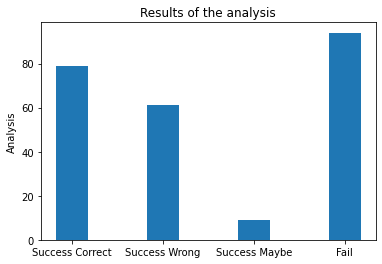

In [483]:
X = ['Success Correct','Success Wrong', 'Success Maybe', 'Fail']
yes = [success_correct_answer, success_wrong_answer,success_maybe_answer, fail_answer]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, yes, 0.35)

  
plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Analysis")
plt.title("Results of the analysis")

plt.show()

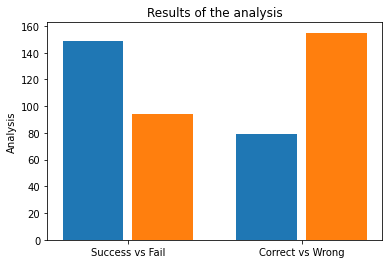

In [476]:
import matplotlib.pyplot as plt

X = ['Success vs Fail','Correct vs Wrong']
yes = [success_answer, correct_answer]
no = [fail_answer, wrong_answer]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yes, 0.35)
plt.bar(X_axis + 0.2, no, 0.35)
  
plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Analysis")
plt.title("Results of the analysis")

plt.show()

In [444]:
times_exec_success = result[result['result'] == '200']['exec_time']
times_exec_success = [float(x) for x in times_exec_success ]
avg_time = sum(times_exec_success) / len(times_exec_success)
print(avg_time)

9.010334261311781


In [445]:
times_exec_fail = result[result['result'] == '400']['exec_time']
times_exec_fail = [float(x) for x in times_exec_fail]
avg_time = sum(times_exec_fail) / len(times_exec_fail)
print(avg_time)

8.154119009667255


In [454]:
times_exec_correct = result[result['Correct'] == 'Yes']['exec_time']
times_exec_correct = [float(x) for x in times_exec_correct ]
avg_time = sum(times_exec_correct) / len(times_exec_correct)
print(avg_time)

9.19629220721088


In [455]:
times_exec_wrong = result[result['Correct'] == 'No']['exec_time']
times_exec_wrong = [float(x) for x in times_exec_wrong]
avg_time = sum(times_exec_wrong) / len(times_exec_wrong)
print(avg_time)

8.394375227343652


8.679123423227066


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'General'), Text(0, 0, 'Success'), Text(0, 0, 'Fail')]

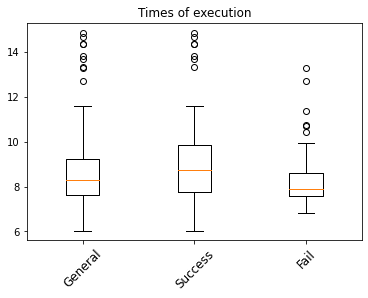

In [453]:
times_exc = result["exec_time"].tolist()
times_exc = [float(x) for x in times_exc ]
avg_time = sum(times_exc) / len(times_exc)
print(avg_time)
fig3, ax3 = plt.subplots()
ax3.set_title('Times of execution')
ax3.boxplot([times_exc, times_exec_success, times_exec_fail ])
ax3.set_xticklabels(['General', 'Success', 'Fail'],
                    rotation=45, fontsize=12)


8.679123423227066


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'General'), Text(0, 0, 'Correct'), Text(0, 0, 'Wrong')]

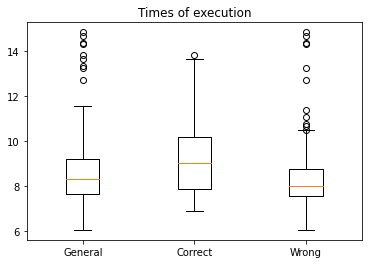

In [457]:
print(avg_time)
fig4, ax4 = plt.subplots()
ax4.set_title('Times of execution')
ax4.boxplot([times_exc, times_exec_correct, times_exec_wrong ])
ax4.set_xticklabels(['General', 'Correct', 'Wrong'])

9.19629220721088
8.76460612015646


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'Correct-Success'), Text(0, 0, 'Wrong-Success')]

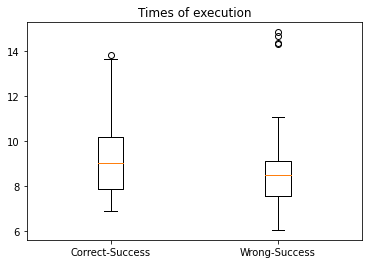

In [462]:
t_corr_succ = result[(result['Correct'] == 'Yes') & (result['result'] == '200')]['exec_time']
t_corr_succ = [float(x) for x in t_corr_succ]
avg_time1 = sum(t_corr_succ) / len(t_corr_succ)
t_wrong_succ = result[(result['Correct'] == 'No') & (result['result'] == '200')]['exec_time']
t_wrong_succ = [float(x) for x in t_wrong_succ]
avg_time2 = sum(t_wrong_succ ) / len(t_wrong_succ )
print(avg_time1)
print(avg_time2)
fig5, ax5 = plt.subplots()
ax5.set_title('Times of execution')
ax5.boxplot([t_corr_succ, t_wrong_succ ])
ax5.set_xticklabels(['Correct-Success', 'Wrong-Success'])

In [ ]:
fig6, ax6 = plt.subplots()
ax6.set_title('Times of execution')
ax6.boxplot([times_exc, times_exec_wrong, times_exec_fail ])
ax6.set_xticklabels(['General', 'Wrong', 'Successful'])

In [396]:
smalls = []
meds = []
bigs = []
files= []
for i in result.original_file_name.unique():
    files.append(i)
    small = result[(result['original_file_name'] == i) & (result['size_category'] == "small")]["Correct"].item()
    smalls.append(small)
    med = result[(result['original_file_name'] == i) & (result['size_category'] == "medium")]["Correct"].item()
    meds.append(med)
    big = result[(result['original_file_name'] == i) & (result['size_category'] == "big")]["Correct"].item()
    bigs.append(big)

In [401]:
file_df = pd.DataFrame((list(zip(files, smalls, meds, bigs))),
              columns =['file_analyzed', 'small', 'medium', 'big'])

In [406]:
file_df

,file_analyzed,small,medium,big
0,lotpolishairTicket.jpeg,Yes,Yes,Yes
1,lotairTicket.jpeg,Yes,Yes,Yes
2,aegeanTicket.jpeg,No,Yes,No
3,aegeanairTicket.jpeg,No,Yes,Yes
4,airfranceTicket copy.jpeg,No,No,No
...,...,...,...,...
76,aeroflotTicket.jpeg,No,No,No
77,vuelingairTicket2.jpeg,No,No,No
78,vuelingTicket.jpeg,No,No,No
79,vuelingairTicket.jpeg,No,No,No


In [477]:
correct_per_file = file_df[(file_df['small'] == "Yes") | (file_df['medium'] == "Yes") | (file_df['big'] == "Yes")]
print(len(correct_per_file.index))
correct_answer_per_file = (len(correct_per_file.index) * 100) / len(file_df.index)
correct_answer_per_file

36


44.44444444444444

In [485]:
wrong_per_file = file_df[(file_df['small'] == "No") & (file_df['medium'] == "No") & (file_df['big'] == "No")]
print(len(wrong_per_file.index))
wrong_answer_per_file = (len(wrong_per_file.index) * 100) / len(file_df.index)
wrong_answer_per_file

42


51.851851851851855

In [486]:
maybe_per_file = file_df[(file_df['small'] == "Maybe") | (file_df['medium'] == "Maybe") | (file_df['big'] == "Maybe")]
print(len(maybe_per_file))
maybe_answer_per_file = (len(maybe_per_file.index) * 100) / len(file_df.index)
maybe_answer_per_file

3


3.7037037037037037

In [487]:
smalls = []
meds = []
bigs = []
files= []
for i in result.original_file_name.unique():
    files.append(i)
    small = result[(result['original_file_name'] == i) & (result['size_category'] == "small")]["result"].item()
    smalls.append(small)
    med = result[(result['original_file_name'] == i) & (result['size_category'] == "medium")]["result"].item()
    meds.append(med)
    big = result[(result['original_file_name'] == i) & (result['size_category'] == "big")]["result"].item()
    bigs.append(big)
file_df2 = pd.DataFrame((list(zip(files, smalls, meds, bigs))),
              columns =['file_analyzed', 'small', 'medium', 'big'])

In [488]:
success_per_file = file_df2[(file_df2['small'] == "200") | (file_df2['medium'] == "200") | (file_df2['big'] == "200")]
print(len(success_per_file.index))
success_per_file_per = (len(success_per_file.index) * 100) / len(file_df2.index)
success_per_file_per

59


72.8395061728395

In [489]:
fail_per_file = file_df2[(file_df2['small'] == "400") & (file_df2['medium'] == "400") & (file_df2['big'] == "400")]
print(len(fail_per_file.index))
fail_per_file_per = (len(fail_per_file.index) * 100) / len(file_df2.index)
fail_per_file_per

22


27.160493827160494

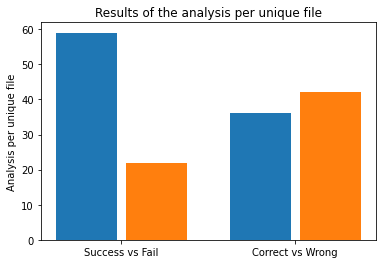

In [490]:

X = ['Success vs Fail','Correct vs Wrong']
yes = [len(success_per_file), len(correct_per_file)]
no = [len(fail_per_file), len(wrong_per_file)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, yes, 0.35)
plt.bar(X_axis + 0.2, no, 0.35)
  
plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Analysis per unique file")
plt.title("Results of the analysis per unique file")

plt.show()

In [494]:
# success_correct_answer = len(result[(result["result"] == "200") & (result["Correct"] == "Yes")])
# success_wrong_answer = len(result[(result["result"] == "200") & (result["Correct"] == "No")])
# success_maybe_answer = len(result[(result["result"] == "200") & (result["Correct"] == "Maybe")])
# print(success_correct_answer)
# print(success_wrong_answer)
# print(success_maybe_answer)

df_file = pd.concat([file_df2, file_df], axis=1)
df_file


,file_analyzed,small,medium,big,file_analyzed,small,medium,big
0,lotpolishairTicket.jpeg,200,200,200,lotpolishairTicket.jpeg,Yes,Yes,Yes
1,lotairTicket.jpeg,200,200,200,lotairTicket.jpeg,Yes,Yes,Yes
2,aegeanTicket.jpeg,200,200,200,aegeanTicket.jpeg,No,Yes,No
3,aegeanairTicket.jpeg,400,200,200,aegeanairTicket.jpeg,No,Yes,Yes
4,airfranceTicket copy.jpeg,400,400,400,airfranceTicket copy.jpeg,No,No,No
...,...,...,...,...,...,...,...,...
76,aeroflotTicket.jpeg,200,200,200,aeroflotTicket.jpeg,No,No,No
77,vuelingairTicket2.jpeg,200,200,200,vuelingairTicket2.jpeg,No,No,No
78,vuelingTicket.jpeg,400,400,400,vuelingTicket.jpeg,No,No,No
79,vuelingairTicket.jpeg,400,200,200,vuelingairTicket.jpeg,No,No,No


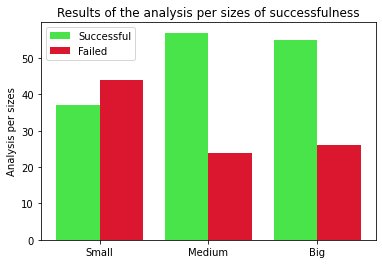

In [525]:
df_file.columns = ['file_analyzed','small', 'medium', 'big', 'file_analyzed1', 'small1', 'medium1', 'big1']
small_succ = df_file[(df_file['small'] == '200')]
med_succ = df_file[(df_file['medium'] == '200')]
big_succ = df_file[(df_file['big'] == '200')]
small_fail = df_file[(df_file['small'] == '400')]
med_fail = df_file[(df_file['medium'] == '400')]
big_fail = df_file[(df_file['big'] == '400')]

X = ['Small','Medium', 'Big']
succ = [len(small_succ.index), len(med_succ.index), len(big_succ.index)]
fail = [len(small_fail.index), len(med_fail.index), len(big_fail.index)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, succ, 0.4, label="Successful", color="#49E449")
plt.bar(X_axis + 0.2, fail, 0.4, label="Failed", color="#DB162F")
  
plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Analysis per sizes")
plt.title("Results of the analysis per sizes of successfulness")
plt.legend(loc="upper left")
plt.show()

16
62


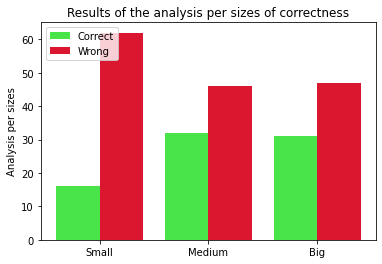

In [527]:
small_correct = df_file[(df_file['small1'] == 'Yes')]
med_correct = df_file[(df_file['medium1'] == 'Yes')]
big_correct = df_file[(df_file['big1'] == 'Yes')]
small_wrong = df_file[(df_file['small1'] == 'No')]
med_wrong = df_file[(df_file['medium1'] == 'No')]
big_wrong = df_file[(df_file['big1'] == 'No')]
print(len(small_correct.index))
print(len(small_wrong.index))
X = ['Small','Medium', 'Big']
correct = [len(small_correct.index), len(med_correct.index), len(big_correct.index)]
wrong = [len(small_wrong.index), len(med_wrong.index), len(big_wrong.index)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, correct, 0.4, label="Correct", color="#49E449")
plt.bar(X_axis + 0.2, wrong, 0.4, label="Wrong", color="#DB162F")
  
plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Analysis per sizes")
plt.title("Results of the analysis per sizes of correctness")
plt.legend(loc="upper left")
plt.show()

In [509]:
xs = df_file[(df_file['small'] == '200') & (df_file['small1'] == 'Yes')]
print(len(xs.index))
ys = df_file[(df_file['small'] == '200') & (df_file['small1'] == 'No')]
print(len(ys.index))

16
18


In [510]:
xm = df_file[(df_file['medium'] == '200') & (df_file['medium1'] == 'Yes')]
print(len(xm.index))
ym = df_file[(df_file['medium'] == '200') & (df_file['medium1'] == 'No')]
print(len(ym.index))

32
22


In [511]:
xb = df_file[(df_file['big'] == '200') & (df_file['big1'] == 'Yes')]
print(len(xb.index))
yb = df_file[(df_file['big'] == '200') & (df_file['big1'] == 'No')]
print(len(yb.index))

31
21


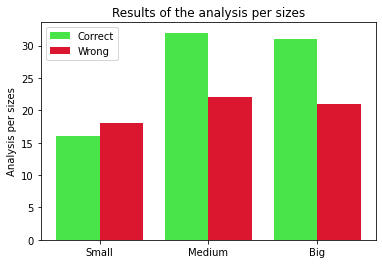

In [523]:

X = ['Small','Medium', 'Big']
correct = [len(xs.index), len(xm.index), len(xb.index)]
wrong = [len(ys.index), len(ym.index), len(yb.index)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, correct, 0.4, label="Correct", color="#49E449")
plt.bar(X_axis + 0.2, wrong, 0.4, label="Wrong", color="#DB162F")
  
plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Analysis per sizes")
plt.title("Results of the analysis per sizes")
plt.legend(loc="upper left")
plt.show()

In [530]:
original_df = pd.read_csv("tickets.csv")
original_df

,Unnamed: 0,directory_name,directory_path,file_name,original_size,small_path,medium_path,big_path,small_size,medium_size,big_size,small_dpi,medium_dpi,big_dpi
0,0,lotpolishair,tickets/lotpolishair,lotpolishairTicket.jpeg,medium,tickets/lotpolishair/im_small/lotpolishairTick...,tickets/lotpolishair/im_medium/lotpolishairTic...,tickets/lotpolishair/im_big/lotpolishairTicket...,"(164, 604)","(564, 1004)","(564, 1004)","(72, 72)","(72, 72)","(72, 72)"
1,1,lotpolishair,tickets/lotpolishair,lotairTicket.jpeg,medium,tickets/lotpolishair/im_small/lotairTicket.jpeg,tickets/lotpolishair/im_medium/lotairTicket.jpeg,tickets/lotpolishair/im_big/lotairTicket.jpeg,"(364, 804)","(253, 450)","(764, 1204)","(1, 1)","(1, 1)","(1, 1)"
2,2,aegeanair,tickets/aegeanair,aegeanTicket.jpeg,medium,tickets/aegeanair/im_small/aegeanTicket.jpeg,tickets/aegeanair/im_medium/aegeanTicket.jpeg,tickets/aegeanair/im_big/aegeanTicket.jpeg,"(53, 250)","(787, 1111)","(453, 650)","(96, 96)","(96, 96)","(96, 96)"
3,3,aegeanair,tickets/aegeanair,aegeanairTicket.jpeg,medium,tickets/aegeanair/im_small/aegeanairTicket.jpeg,tickets/aegeanair/im_medium/aegeanairTicket.jpeg,tickets/aegeanair/im_big/aegeanairTicket.jpeg,"(587, 911)","(548, 343)","(987, 1311)","(96, 96)","(96, 96)","(96, 96)"
4,4,airfrance,tickets/airfrance,airfranceTicket copy.jpeg,medium,tickets/airfrance/im_small/airfranceTicket cop...,tickets/airfrance/im_medium/airfranceTicket co...,tickets/airfrance/im_big/airfranceTicket copy....,"(348, 143)","(563, 311)","(748, 543)","(72, 72)","(72, 72)","(72, 72)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,aeroflot,tickets/aeroflot,aeroflotTicket.jpeg,medium,tickets/aeroflot/im_small/aeroflotTicket.jpeg,tickets/aeroflot/im_medium/aeroflotTicket.jpeg,tickets/aeroflot/im_big/aeroflotTicket.jpeg,"(1606, 1382)","(787, 1111)","(2006, 1782)","(96, 96)","(96, 96)","(96, 96)"
77,77,vuelingair,tickets/vuelingair,vuelingairTicket2.jpeg,medium,tickets/vuelingair/im_small/vuelingairTicket2....,tickets/vuelingair/im_medium/vuelingairTicket2...,tickets/vuelingair/im_big/vuelingairTicket2.jpeg,"(587, 911)","(793, 1115)","(987, 1311)","(96, 96)","(96, 96)","(96, 96)"
78,78,vuelingair,tickets/vuelingair,vuelingTicket.jpeg,medium,tickets/vuelingair/im_small/vuelingTicket.jpeg,tickets/vuelingair/im_medium/vuelingTicket.jpeg,tickets/vuelingair/im_big/vuelingTicket.jpeg,"(593, 915)","(564, 1003)","(993, 1315)","(72, 72)","(72, 72)","(72, 72)"
79,79,vuelingair,tickets/vuelingair,vuelingairTicket.jpeg,medium,tickets/vuelingair/im_small/vuelingairTicket.jpeg,tickets/vuelingair/im_medium/vuelingairTicket....,tickets/vuelingair/im_big/vuelingairTicket.jpeg,"(364, 803)","(793, 1115)","(764, 1203)","(96, 96)","(96, 96)","(96, 96)"


In [561]:

small_list = original_df['small_size'].tolist()
for i in range(0, len(small_list)):
    x = eval(small_list[i])
    small_list[i] = x

small_dpi = original_df['small_dpi'].tolist()
for i in range(0, len(small_dpi)):
    x = eval(small_dpi[i])
    small_dpi[i] = x

In [562]:
mean_res = [sum(y) / len(y) for y in zip(*small_list)]
print(mean_res)
mean_dpi = [sum(y) / len(y) for y in zip(*small_dpi)]
print(mean_dpi)

[538.1604938271605, 782.0370370370371]
[88.82716049382717, 88.82716049382717]


In [563]:
results_tot = pd.read_csv("results_tot.csv")
results_tot

,Unnamed: 0,id,file_analyzed,size_category,original_file_name,dir_name,exec_time,result,Correct,trip _start,trip_end,routes
0,1,0,tickets/lotpolishair/im_small/lotpolishairTick...,small,lotpolishairTicket.jpeg,tickets/lotpolishair,8.040530,200,Yes,Warsaw Chopin Airport,VÃ¡clav Havel Airport Prague,[]
1,2,1,tickets/lotpolishair/im_medium/lotpolishairTic...,medium,lotpolishairTicket.jpeg,tickets/lotpolishair,9.492479,200,Yes,-1,-1,"[[482.9266982618261, ['Warsaw Chopin Airport',..."
2,3,2,tickets/lotpolishair/im_big/lotpolishairTicket...,big,lotpolishairTicket.jpeg,tickets/lotpolishair,9.519685,200,Yes,-1,-1,"[[482.9266982618261, ['Warsaw Chopin Airport',..."
3,4,3,tickets/lotpolishair/im_small/lotairTicket.jpeg,small,lotairTicket.jpeg,tickets/lotpolishair,8.293320,200,Yes,Singapore Changi Airport,Warsaw Chopin Airport,[]
4,5,4,tickets/lotpolishair/im_medium/lotairTicket.jpeg,medium,lotairTicket.jpeg,tickets/lotpolishair,7.784129,200,Yes,Singapore Changi Airport,Warsaw Chopin Airport,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
238,41,40,tickets/vuelingair/im_medium/vuelingairTicket....,medium,vuelingairTicket.jpeg,tickets/vuelingair,8.534052,200,No,Humberto Delgado Airport (Lisbon Portela Airport),Humberto Delgado Airport (Lisbon Portela Airport),[]
239,42,41,tickets/vuelingair/im_big/vuelingairTicket.jpeg,big,vuelingairTicket.jpeg,tickets/vuelingair,8.805656,200,No,Humberto Delgado Airport (Lisbon Portela Airport),Humberto Delgado Airport (Lisbon Portela Airport),[]
240,43,42,tickets/unitedair/im_small/unitedairTicket.jpeg,small,unitedairTicket.jpeg,tickets/unitedair,8.596272,400,No,NaN,NaN,[]
241,44,43,tickets/unitedair/im_medium/unitedairTicket.jpeg,medium,unitedairTicket.jpeg,tickets/unitedair,8.397924,200,No,Clarence A. Bain Airport,Roswell Air Center Airport,[]


In [568]:
small_time = results_tot[results_tot['size_category'] == 'small']['exec_time'].tolist()
med_time = results_tot[results_tot['size_category'] == 'medium']['exec_time'].tolist()
big_time = results_tot[results_tot['size_category'] == 'big']['exec_time'].tolist()

[Text(0, 0, 'Small'), Text(0, 0, 'Medium'), Text(0, 0, 'Big')]

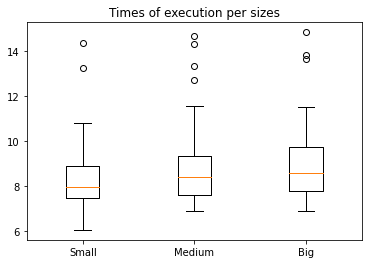

In [570]:
fig6, ax6 = plt.subplots()
ax6.set_title('Times of execution per sizes')
ax6.boxplot([small_time, med_time, big_time ])
ax6.set_xticklabels(['Small', 'Medium', 'Big'])